In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import r2_score

In [3]:
dados = pd.read_csv('FuelConsumptionCo2.csv')
dados.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [5]:
dados = dados[['ENGINESIZE', 'CO2EMISSIONS']]
dados

,ENGINESIZE,CO2EMISSIONS
0,2.0,196
1,2.4,221
2,1.5,136
3,3.5,255
4,3.5,244
...,...,...
1062,3.0,271
1063,3.2,264
1064,3.0,271
1065,3.2,260


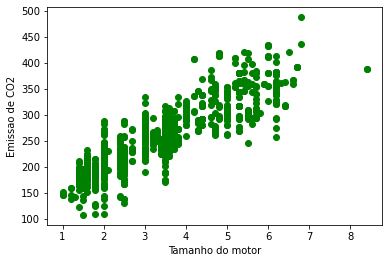

In [6]:
plt.scatter(dados["ENGINESIZE"], dados["CO2EMISSIONS"], color="green")
plt.xlabel("Tamanho do motor")
plt.ylabel("Emissao de CO2")
plt.show()

In [7]:
treino = dados[:(int((len(dados)*0.8)))]
teste = dados[(int((len(dados)*0.8))):]

In [9]:
regressao = linear_model.LinearRegression()

x = np.array(treino[["ENGINESIZE"]])
y = np.array(treino[["CO2EMISSIONS"]])

regressao.fit(x, y)

print("Coeficiente de regressão", regressao.coef_)
print("Interceptação", regressao.intercept_)

Coeficiente de regressão [[38.79512384]]
Interceptação [127.16989951]


Text(0, 0.5, 'Emissao de CO2')

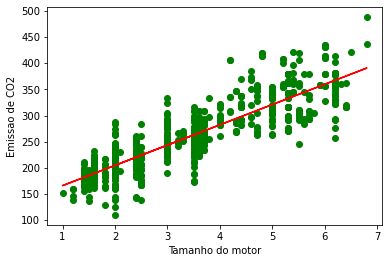

In [10]:
plt.scatter(treino["ENGINESIZE"], treino["CO2EMISSIONS"], color="green")
plt.plot(x, regressao.coef_* x + regressao.intercept_, '-r')
plt.xlabel("Tamanho do motor")
plt.ylabel("Emissao de CO2")

In [11]:
def obter_previsao(motor, interceptacao, coef_regressao):
    valores_previstos = motor*coef_regressao + interceptacao
    
    return valores_previstos

In [12]:
tamanho_motor = 3.5

emissao_estimada = obter_previsao(tamanho_motor, regressao.intercept_, regressao.coef_[0][0])
print("Emissao estimada para este tamanho de moto:", emissao_estimada)

Emissao estimada para este tamanho de moto: [262.95283294]


In [14]:
x = np.array(teste[["ENGINESIZE"]])
y = np.array(teste[["CO2EMISSIONS"]])
y_ = regressao.predict(x)

print("Erro médio absoluto: ", np.mean(np.absolute(y_ - y)))
print("Média da soma dos quadrados: ", np.mean((y_ - y)**2))
print("R2-Score: ", r2_score(y_,y))


Erro médio absoluto:  20.602197903009664
Média da soma dos quadrados:  746.4537521463632
R2-Score:  0.7097615711758998
